#### <b><div style='padding:8px;background-color:#003f88;color:white;border-radius:2px;font-size:100%;text-align: left'>Californian House Price Analysis</div></b>

#### Project Overview
The aim of this project is to analyze the features that defines Californian house prices

#### Import Required Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import joblib
import pickle

import warnings
warnings.filterwarnings("ignore")

In [12]:
# Load the Data
file_path = r"C:\Users\Harrison\Downloads\housing.csv"

data = pd.read_csv(file_path)

data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


The dataset used in this project was derived from the 1990 U.S. Census. It contains data about various block groups in California. A block group typically has a population of 600 to 3,000 people. The dataset includes the following features:

- Latitude: The geographical latitude of the block group. Positive values indicate locations north of the equator.
- Longitude: The geographical longitude of the block group. Negative values indicate locations west of the prime meridian
- housing_median_age: The median age of the houses within the block group.
- total_rooms: The total number of rooms in all houses within the block group.
- total_bedrooms: The total number of bedrooms in all houses within the block group.
- population: The total population of the block group.
- households: The total number of households (i.e., distinct residential units) within the block group.
- median_income: The median income for households within the block group, measured in tens of thousands of dollars.
- median_house_value: The median house value within the block group, measured in dollars.
- ocean_proximity: The proximity of the block group to the ocean. Categories include "NEAR BAY", "NEAR OCEAN", "INLAND", "ISLAND", and "1H OCEAN" (less than one hour to the ocean)

#### Data Investigation & Cleaning

In [15]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [16]:
data.shape

(20640, 10)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [18]:
# Check the number unique values in each features

data.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

In [19]:
# Check for unique values in ocean_proximity

data["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [20]:
# Check for missing values
missing_values = data.isnull().sum()

# Calculate the percentage of missing data in each column
missing_percentage = (missing_values / len(data)) * 100

# Display the missing data statistics
print("Missing Values in Each Column:\n", missing_values)
print("\nPercentage of Missing Data:\n", missing_percentage)

Missing Values in Each Column:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Percentage of Missing Data:
 longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


In [21]:
# Remove rows with missing values
data_cleaned = data.dropna()

# Verify that missing values have been removed
print("\Missing values in each column after removal:")
print(data_cleaned.isnull().sum())

\Missing values in each column after removal:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [22]:
data_cleaned.shape

(20433, 10)

#### Data Exploration and Visualization

In [24]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [25]:
data.describe(include=["object", "bool"])

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


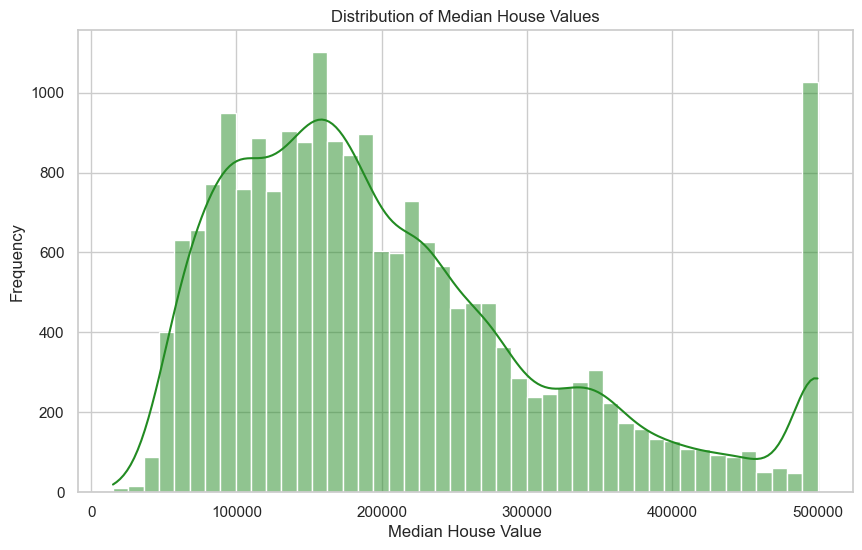

In [26]:
sns.set(style = "whitegrid")
plt.figure(figsize = (10, 6))
sns.histplot(data_cleaned['median_house_value'], color = 'forestgreen', kde = True)
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')

plt.show()

- ##### Using InterQualtile Range to Remove Outliers

Indented block

In [29]:
# Assuming 'data' is your DataFrame and 'median_house_value'is the column of interest
Q1 = data_cleaned['median_house_value'].quantile(0.25)
print(Q1)
Q3 = data_cleaned['median_house_value'].quantile(0.75)
print(Q3)

# Interqualtile range
IQR = Q3 - Q1

# Define the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers_1 = data_cleaned[(data_cleaned['median_house_value'] >= lower_bound) & (data_cleaned['median_house_value'] <= upper_bound)]

# Check the shape of the data before and after removal of outliers
print("Original data shape:", data_cleaned.shape)
print("New data shape without outliers:", data_no_outliers_1.shape)

119500.0
264700.0
Original data shape: (20433, 10)
New data shape without outliers: (19369, 10)


- ##### Using BoxPlot for Outlier Detection

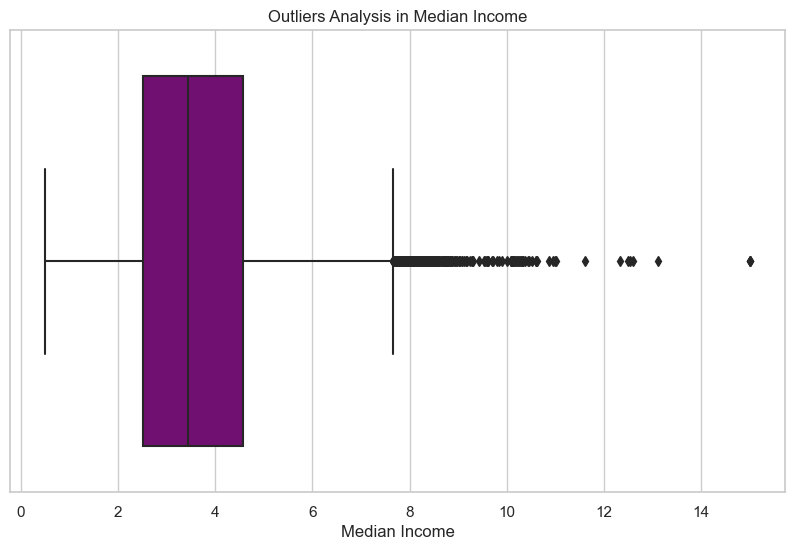

In [31]:
# Outliers in Mdedian Income
plt.figure(figsize = (10, 6))
sns.boxplot(x=data_no_outliers_1['median_income'], color='purple')
plt.title('Outliers Analysis in Median Income')
plt.xlabel('Median Income')

plt.show()

In [32]:
# Calculate Q1 and Q3
Q1 = data_no_outliers_1['median_income'].quantile(0.25)
Q3 = data_no_outliers_1['median_income'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers_2 = data_no_outliers_1[(data_no_outliers_1['median_income'] >= lower_bound) & (data_no_outliers_1['median_income'] <= upper_bound)]

# Check the shape of the data before and after removal of outliers
print("Original data shape:", data_no_outliers_1.shape)
print("Data shape without outliers:", data_no_outliers_2.shape)

Original data shape: (19369, 10)
Data shape without outliers: (19026, 10)


In [33]:
# Representing our DataFrame with a new name, 'data'

data = data_no_outliers_2

- ##### Correlation Heatmap

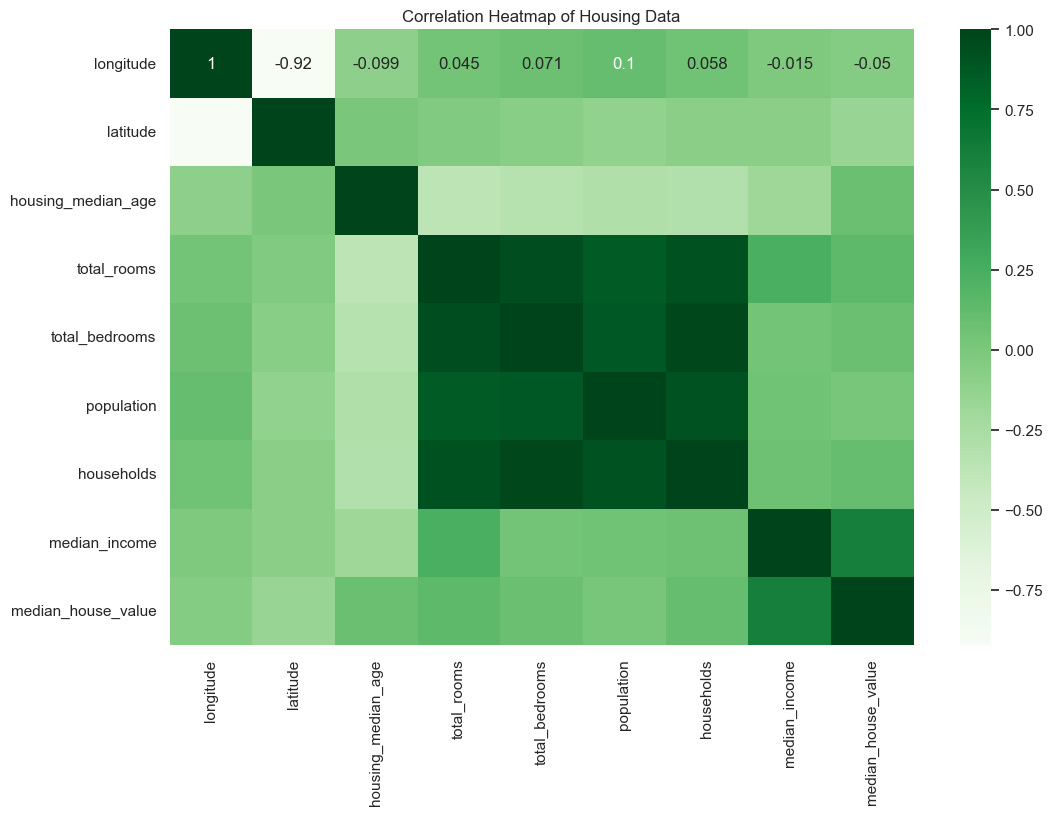

In [35]:
# #  correlation between the target feature and all the features in the dataset
numeric_data = data.select_dtypes(include="number") # Select numeric features only
corr_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Greens')
plt.title('Correlation Heatmap of Housing Data')

plt.show()

total_bedrooms have a strong positive relationship with some independent variables, to avoid multi-collinearity, we will drop it

In [37]:
data = data.drop("total_bedrooms", axis=1)
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity'],
      dtype='object')

In [38]:
# Unique Value count for categorical data
for column in ['ocean_proximity']: # Add other categorical columns if any
    print(f"Unique values in {column}:", data[column].unique())

Unique values in ocean_proximity: ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


##### String Data Categorization to Dummy Variables

In [40]:
# Encoding with pd.get_dummies
ocean_proximity_dummies = pd.get_dummies(data['ocean_proximity'], prefix='ocean_proximity')

# Convert the dummy variables to integers (0 and 1)
ocean_proximity_dummies = ocean_proximity_dummies.astype(int)

# Concatenate the encoded variables back to the original DataFrame
data = pd.concat([data.drop("ocean_proximity", axis=1), ocean_proximity_dummies], axis=1)

# Display the result
ocean_proximity_dummies

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,1,0
6,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [41]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [42]:
data = data.drop("ocean_proximity_ISLAND", axis = 1)
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [43]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,0,0,1,0
5,-122.25,37.85,52.0,919.0,413.0,193.0,4.0368,269700.0,0,0,1,0
6,-122.25,37.84,52.0,2535.0,1094.0,514.0,3.6591,299200.0,0,0,1,0
7,-122.25,37.84,52.0,3104.0,1157.0,647.0,3.1200,241400.0,0,0,1,0
8,-122.26,37.84,42.0,2555.0,1206.0,595.0,2.0804,226700.0,0,0,1,0
9,-122.25,37.84,52.0,3549.0,1551.0,714.0,3.6912,261100.0,0,0,1,0
10,-122.26,37.85,52.0,2202.0,910.0,402.0,3.2031,281500.0,0,0,1,0
11,-122.26,37.85,52.0,3503.0,1504.0,734.0,3.2705,241800.0,0,0,1,0


#### Building Machine Learning Model
- Linear Regression

Linear Regression Assumptions:
1.  Linearity: model is linear in parameters
2. Random Sample: all observations in the sample are randomly selected
3. Exogeneity: each independent variables is uncorrelated with the error terms
4. Homoscedasticity: variance of all error terms is constant
5. No Perfect Multi-Collinearity: there are no exact linear relationship between the independent variables


In [45]:
# Define your features (independent variabless) and target (dependent variable)
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms','population', 'households', 'median_income',
            'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND','ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']
target = ["median_house_value"]

X = data[features]
y= data[target]

# Split the data into training set and testing set
# test_size specifies the proportion of the data to be included in the test split
# random_state ensures reproducubility of your split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

# Check the size of the splits
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')

Training set size: 15220 samples
Test set size: 3806 samples


#### Training

In [47]:
X_train

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
15578,-116.90,33.03,11.0,3213.0,1975.0,579.0,3.4750,1,0,0,0
1656,-121.93,37.89,13.0,2085.0,852.0,264.0,7.3445,0,1,0,0
9190,-118.35,34.32,52.0,102.0,54.0,32.0,1.9875,1,0,0,0
11839,-120.95,39.93,26.0,2023.0,922.0,365.0,2.8125,0,1,0,0
12267,-116.91,33.75,13.0,10886.0,4266.0,1955.0,2.3169,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
15355,-117.32,33.25,7.0,8206.0,4399.0,1423.0,3.6301,1,0,0,0
9608,-120.51,37.29,20.0,4927.0,4205.0,1009.0,1.7679,0,1,0,0
12606,-121.49,38.50,32.0,2364.0,1331.0,449.0,3.3190,0,1,0,0
2907,-119.03,35.37,52.0,1503.0,554.0,277.0,1.6786,0,1,0,0


In [48]:
# Adding a constant to the predictors because statsmodels' OLS doesn't include it by default
X_train_const = sm.add_constant(X_train)
X_train_const

,const,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
15578,1.0,-116.90,33.03,11.0,3213.0,1975.0,579.0,3.4750,1,0,0,0
1656,1.0,-121.93,37.89,13.0,2085.0,852.0,264.0,7.3445,0,1,0,0
9190,1.0,-118.35,34.32,52.0,102.0,54.0,32.0,1.9875,1,0,0,0
11839,1.0,-120.95,39.93,26.0,2023.0,922.0,365.0,2.8125,0,1,0,0
12267,1.0,-116.91,33.75,13.0,10886.0,4266.0,1955.0,2.3169,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15355,1.0,-117.32,33.25,7.0,8206.0,4399.0,1423.0,3.6301,1,0,0,0
9608,1.0,-120.51,37.29,20.0,4927.0,4205.0,1009.0,1.7679,0,1,0,0
12606,1.0,-121.49,38.50,32.0,2364.0,1331.0,449.0,3.3190,0,1,0,0
2907,1.0,-119.03,35.37,52.0,1503.0,554.0,277.0,1.6786,0,1,0,0


In [49]:
# Fit the OLS model
model_fitted = sm.OLS(y_train, X_train_const).fit()

# Printing Summary
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     1973.
Date:                Wed, 28 Aug 2024   Prob (F-statistic):               0.00
Time:                        12:05:59   Log-Likelihood:            -1.8879e+05
No. Observations:               15220   AIC:                         3.776e+05
Df Residuals:                   15208   BIC:                         3.777e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

### Analysis of the OLS Regression Results

#### 1. **Model Overview:**
   - **Dependent Variable:** `median_house_value` 
   - **Model Type:** Ordinary Least Squares (OLS)
   - **R-squared:** 0.588
   - **Adjusted R-squared:** 0.588

The R-squared value of 0.588 suggests that approximately 58.8% of the variability in the median house value can be explained by the independent variables in the model. The Adjusted R-squared, which accounts for the number of predictors in the model, remains the same, indicating that the model is a good fit for the data without overfitting.

#### 2. **Model Significance:**
   - **F-statistic:** 1973
   - **Prob (F-statistic):** 0.00

The F-statistic tests the overall significance of the model. The very low p-value (0.00) indicates that the model is statistically significant, and the independent variables collectively have a significant effect on the dependent variable.

#### 3. **Coefficients Interpretation:**
   - **Intercept (const):** -1.747e+06

   The intercept represents the expected mean value of `median_house_value` when all independent variables are zero. In this case, it is not meaningful as zero values for predictors like `median_income`, `housing_median_age`, etc., are unrealistic.

   - **Independent Variables:**
     - **longitude (-2.268e+04):** For each unit increase in longitude, the median house value is expected to decrease by approximately 22,680, holding other variables constant.

     - **latitude (-2.109e+04):** For each unit increase in latitude, the median house value is expected to decrease by approximately 21,090, holding other variables constant.

     - **housing_median_age (846.4636):** For each year increase in the median age of houses, the median house value is expected to increase by 846.46, holding other variables constant.

     - **total_rooms (-2.6698):** Each additional room decreases the median house value by $2.67, holding other variables constant.
     - **population (-33.1937):** For each additional person in the population, the median house value decreases by 33.19, holding other variables constant.

     - **households (124.3609):** Each additional household increases the median house value by $124.36, holding other variables constant.
     - **median_income (3.562e+04):** For each unit increase in median income, the median house value increases by approximately 35,620, holding other variables constant.

     - **ocean_proximity_<1H OCEAN (-1.7e+05):** Being located within 1 hour of the ocean decreases the median house value by approximately 170,000 compared to the base category (possibly "ISLAND").

     - **ocean_proximity_INLAND (-2.108e+05):** Being inland decreases the median house value by approximately 210,800 compared to the base category.
     - **ocean_proximity_NEAR BAY (-1.779e+05):** Being near a bay decreases the median house value by approximately 177,900 compared to the base category.
     - **ocean_proximity_NEAR OCEAN (-1.689e+05):** Being near the ocean decreases the median house value by approximately 168,900 compared to the base category.

All the coefficients have p-values of 0.000, indicating that they are statistically significant at a 5% significance level.

#### 4. **Model Diagnostics:**
   - **Omnibus (3434.427), Prob(Omnibus): 0.000** - Suggests that the residuals are not normally distributed.
   - **Durbin-Watson (2.004):** Indicates no significant autocorrelation in the residuals.
   - **Jarque-Bera (JB) (10645.381), Prob(JB): 0.000** - Also indicates non-normality of the residuals.
   - **Condition Number (7.61e+05):** A large condition number suggests potential multicollinearity issues among the independent variables.

#### 5. **Key Takeaways:**
   - The model is statistically significant and explains a reasonable proportion of the variance in the dependent variable.
   - The coefficients provide insights into how each independent variable influences the median house value.
   - Diagnostics suggest potential issues with multicollinearity and non-normality of residuals, which may need to be addressed.

This analysis gives a comprehensive understanding of the output from the OLS regression model, helping to evaluate the model's reliability and the influence of each predictor.

#### Predicting/Testing

In [52]:
# Adding a constant to the test predictors
X_test_const = sm.add_constant(X_test)

# Making predictions on the test set
test_predictions = model_fitted.predict(X_test_const)
test_predictions

7322     153414.201880
465      239312.044180
12768     70054.781175
2617     189568.171319
13351    184267.795032
             ...      
11691    171568.742378
1454     215893.783794
7360     129935.765388
19118    232846.312809
13084    207120.213485
Length: 3806, dtype: float64

#### Checking OLS Assumptions

- ##### Assumption 1: Linearity
  - The model is linear in parameters

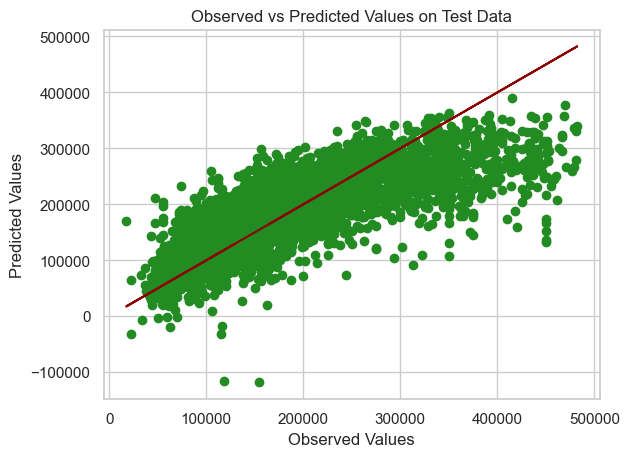

In [55]:
# Scatter plot for observed vs predicted values on test data
plt.scatter(y_test, test_predictions, color = "forestgreen")
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs Predicted Values on Test Data')
plt.plot(y_test, y_test, color='darkred') # Line for perfect prediction (true values)

plt.show()

**Positive Linear relationship**: The red line (which represent a perfect prediction line) and the distribution of the data points suggest there's a positive linear relationship between the observed and predicted values. This means that as the actual values increase, the predicted values also increase, which is a good sign for linearity

- ##### Assumption 2: Random sample
  - All observations in the sample are randomly selected


In [58]:
# Calculate the mean of the residuals
mean_residuals = np.mean(model_fitted.resid)

print(f"The mean of the residuals is {np.round(mean_residuals,2)}")


The mean of the residuals is -0.0


While we cannot directly observe the true errors in the model, we can work with the residuals, which are the difference between the observed values and predicted values from the model. If the model is well-fitted, the residuals should be randomly scattered around zero without any systematic patterns

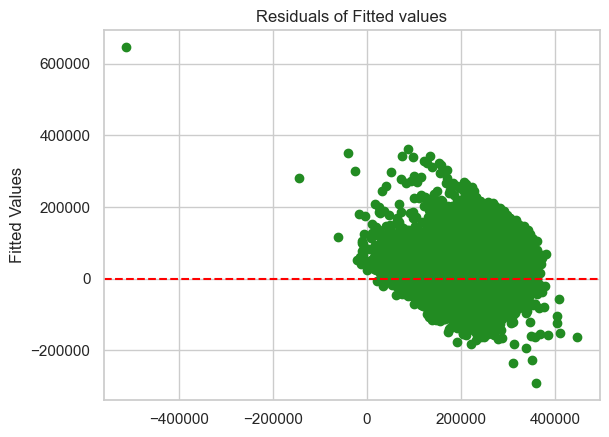

In [60]:
# Plotting the residuals
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color = "forestgreen")
plt.axhline(y=0, color='red', linestyle='--')
plt.ylabel('Fitted Values')
plt.title('Residuals of Fitted values')

plt.show()

In this plot, we don't see any discernible patterns. The residuals are thus randomly distributed around the horizontal line at zero, with no clear shape or trend. If there's a pattern, or if the residuals show a systematic deviation from zero, it could suggest issues such as model misspecification, non-linearity, or omitted variable bias.

- ##### Assumption 3: Exogeneity
  - Each independent variables is uncorrelated with the error terms

In [63]:
# Calculate the residuals
residuals = model_fitted.resid

# Check for correlation between residuals and each predictor
for column in X_train.columns:
    corr_coefficient = np.corrcoef(X_train[column], residuals)[0, 1]
    print(f'Correlation between residuals and {column}: {np.round(corr_coefficient, 2)}')

Correlation between residuals and longitude: -0.0
Correlation between residuals and latitude: -0.0
Correlation between residuals and housing_median_age: -0.0
Correlation between residuals and total_rooms: 0.0
Correlation between residuals and population: 0.0
Correlation between residuals and households: 0.0
Correlation between residuals and median_income: 0.0
Correlation between residuals and ocean_proximity_<1H OCEAN: 0.0
Correlation between residuals and ocean_proximity_INLAND: -0.0
Correlation between residuals and ocean_proximity_NEAR BAY: -0.0
Correlation between residuals and ocean_proximity_NEAR OCEAN: 0.0


The second method of checking exogeneity is the Durbin-Wu-Hausman Test.

**Durbin-Wu-Hausman Test:** For a more formal statistical test, use the Durbin-Wu-Hausman test. This involves comparing your model with one that includes an instrumental variable. This test checks whether the model's coefficients change significantly when the potentially endogenous variables are instrumented. This test is a more advanced, econometrical approach and requires the identification of suitable instruments, which is not always straightforward.

- ##### Assumption 4: Homoscedasticity
  - The  variance of all error terms is constant


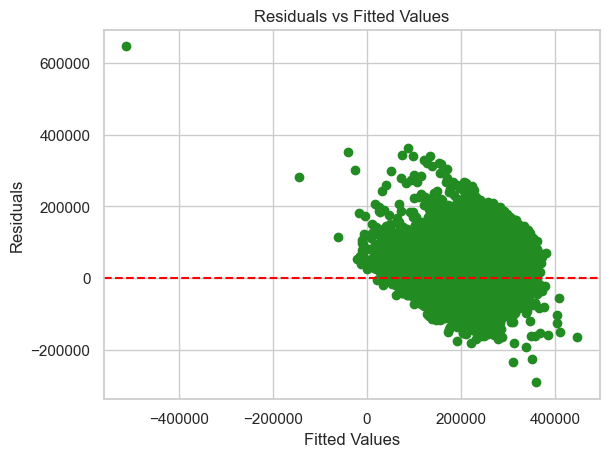

In [66]:
# Plotting the residuals
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color="forestgreen")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')

plt.show()

The homoscedasticity assumption is violated. This means that our error terms do not have a variation that is constant across all the observations, and we have a high variation and different variation for different observations

**Random Scatter**: If the plot shows a random scatter of residuals around the horizontal line at zero, it supports the homoscedasticity assumption.

**Pattern or Shape**: If residuals display a pattern (such as a curve) or form a funnel shape where the spread increases with fitted values, this would suggest heteroscedasticity, meaning the residuals' variance changes with the independent variables' level.

#### Train/Test/Evaluation with Sklearn

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to the test data
X_test_scaled = scaler.transform(X_test)

# Create and fit the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = lr.predict(X_test_scaled)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

# Output the performance metrics
print(f'MSE on Test Set: {mse}')
print(f'RMSE on Test Set: {rmse}')


MSE on Test Set: 3529059611.573431
RMSE on Test Set: 59405.888694416746


In [70]:
print(y_pred)
y_test

[[153414.2018804 ]
 [239312.04418031]
 [ 70054.78117497]
 ...
 [129935.7653883 ]
 [232846.31280863]
 [207120.21348536]]


,median_house_value
7322,164400.0
465,196400.0
12768,65200.0
2617,73600.0
13351,195100.0
...,...
11691,217000.0
1454,229200.0
7360,142000.0
19118,200600.0


In [71]:
# Save the model and scaler using joblib
import joblib

joblib.dump(lr, 'linear_regression_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

####  Apply Lasso/Ridge Regression

In [73]:
from sklearn.linear_model import Lasso, Ridge

# Lasso Regression
lasso = Lasso(alpha=0.001)  # You can adjust alpha for regularization strength
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

# Calculate RMSE for Lasso
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = sqrt(mse_lasso)
print(f'RMSE for Lasso Regression: {rmse_lasso}')

# Ridge Regression
ridge = Ridge(alpha=0.1)  # You can adjust alpha for regularization strength
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

# Calculate RMSE for Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = sqrt(mse_ridge)
print(f'RMSE for Ridge Regression: {rmse_ridge}')


RMSE for Lasso Regression: 59434.10575088558
RMSE for Ridge Regression: 59406.275955991754


#### Lasso Regression with Cross-Validation

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

# Lasso Regression with Cross-Validation
lasso = Lasso(alpha=0.001)  # Adjust alpha as needed
lasso_cv_scores = cross_val_score(lasso, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate RMSE for Lasso using cross-validation
lasso_rmse_cv = np.sqrt(-lasso_cv_scores.mean())
print(f'Cross-Validated RMSE for Lasso Regression: {lasso_rmse_cv}')

# Fit Lasso on the full training set for final evaluation
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

# Calculate RMSE for Lasso on the test set
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
print(f'Test RMSE for Lasso Regression: {rmse_lasso}')

Cross-Validated RMSE for Lasso Regression: 59178.505751784505
Test RMSE for Lasso Regression: 59434.10575088558


#### Ridge Regression with Cross-Validation

In [77]:
# Ridge Regression with Cross-Validation
ridge = Ridge(alpha=0.1)  # Adjust alpha as needed
ridge_cv_scores = cross_val_score(ridge, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate RMSE for Ridge using cross-validation
ridge_rmse_cv = np.sqrt(-ridge_cv_scores.mean())
print(f'Cross-Validated RMSE for Ridge Regression: {ridge_rmse_cv}')

# Fit Ridge on the full training set for final evaluation
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

# Calculate RMSE for Ridge on the test set
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
print(f'Test RMSE for Ridge Regression: {rmse_ridge}')


Cross-Validated RMSE for Ridge Regression: 59155.775259474234
Test RMSE for Ridge Regression: 59406.275955991754


#### Using Grid Search for Hyperparameter Tuning

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge

# Define the model
lasso = Lasso()
ridge = Ridge()

# Define the parameter grid
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Lasso Grid Search
lasso_grid = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train_scaled, y_train)

print(f'Best alpha for Lasso: {lasso_grid.best_params_}')
print(f'Best cross-validated RMSE for Lasso: {np.sqrt(-lasso_grid.best_score_)}')

# Ridge Grid Search
ridge_grid = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train_scaled, y_train)

print(f'Best alpha for Ridge: {ridge_grid.best_params_}')
print(f'Best cross-validated RMSE for Ridge: {np.sqrt(-ridge_grid.best_score_)}')


Best alpha for Lasso: {'alpha': 0.001}
Best cross-validated RMSE for Lasso: 59178.505751784505
Best alpha for Ridge: {'alpha': 0.1}
Best cross-validated RMSE for Ridge: 59155.775259474234


- #### Assumption 5. No Perfect Multi-Collinearity:
  - There are no exact linear relationship between the independent variable

- Check for Multicollinearity

High multicollinearity among features can lead to unstable estimates. Use Variance Inflation Factor (VIF) to check for multicollinearity and consider removing highly correlated features.

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X_train is your feature set
X_train_with_const = sm.add_constant(X_train_scaled)  # Add constant for VIF calculation
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_with_const, i) for i in range(1, X_train_with_const.shape[1])]

print(vif_data)


                       Feature         VIF
0                    longitude   17.557422
1                     latitude   19.602377
2           housing_median_age    1.353532
3                  total_rooms   10.162244
4                   population    6.026501
5                   households   12.126845
6                median_income    1.579038
7    ocean_proximity_<1H OCEAN  936.577999
8       ocean_proximity_INLAND  854.603148
9     ocean_proximity_NEAR BAY  364.847924
10  ocean_proximity_NEAR OCEAN  410.725884


#### Explanation of the Results:
2. **Longitude and Latitude**:
   - **VIF Values**: 17.56 and 19.60, respectively.
   - These values suggest moderate multicollinearity. While they are not excessively high, they indicate some correlation with other features.

3. **Housing Median Age**:
   - **VIF Value**: 1.35
   - This low value indicates that this feature is not highly correlated with others, making it a stable predictor.

4. **Total Rooms**:
   - **VIF Value**: 10.16
   - This value indicates some level of multicollinearity, but it is not an immediate cause for concern.

5. **Population and Households**:
   - **VIF Values**: 6.03 and 12.13, respectively.
   - Both values indicate a moderate level of multicollinearity.

6. **Median Income**:
   - **VIF Value**: 1.58
   - This low value suggests that median income is a stable feature without significant multicollinearity issues.

7. **Ocean Proximity Features**:
   - **VIF Values**:
     - ocean_proximity_1H_OCEAN: 936.58
     - ocean_proximity_INLAND: 854.60
     - ocean_proximity_NEAR_BAY: 364.85
     - ocean_proximity_NEAR_OCEAN: 410.73
   - These values are very high, indicating severe multicollinearity. The ocean proximity features are likely capturing similar information, which can distort the regression model's estimates.

### General Guidelines for VIF:
- **VIF < 5**: Generally considered acceptable.
- **5 < VIF < 10**: Indicates moderate multicollinearity; may need further investigation.
- **VIF > 10**: Indicates high multicollinearity; consider removing or combining features.

### Recommendations:
1. **Remove or Combine Features**: For features with high VIF values (especially ocean proximity), consider removing some or combining them to reduce multicollinearity.

2. **Feature Selection**: We can use techniques like Lasso regression, which can help in feature selection by shrinking the coefficients of less important features to zero.

3. **Model Re-evaluation**: After addressing multicollinearity, we can re-evaluate our model to see if performance improves.

By addressing the multicollinearity indicated by the VIF values, we can enhance the reliability of your regression model's predictions.